# Fine Tuning Llama2


# Setup the Model
The following section performs all the setup of the model.
This includes

- Installing any dependencies
- Setting any configuration
- Downloading the Base Model

## Install dependencies
In order to get started we need to install the appropriate dependencies.We are ensuring everything needed for the training process is available.

- **accelerate**: Helps in accelerating Python programs with minimal code changes.

- **peft**: Provides utilities for efficiently fine-tuning transformers.

- **transformers**: Provides state-of-the-art general-purpose architectures for Natural Language Understanding (NLU) and Natural Language Generation (NLG).

- **bitsandbytes**: Used for quantization, which reduces the memory footprint of models.

- **trl**: Provides the Supervised Fine-Tuning (SFT) library for fine-tuning models.

- **sentencepiece**: Used for tokenization.

- **einops**: Simplifies tensor operations by making them more readable.

- **datasets** : Provides datasets for various machine learning tasks


In [2]:
pip install transformers --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.3 MB/s eta 0:00:00


In [3]:
pip install -q accelerate peft transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 7.8 MB/s eta 0:00:00


In [4]:
pip install -q bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 3.6 MB/s eta 0:00:00


In [5]:
pip install -q trl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.4 MB/s eta 0:00:00


In [6]:
pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00


In [7]:
pip install -q -U einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.7 MB/s eta 0:00:00


In [8]:
pip install -q datasets

In [9]:
pip install tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.9 MB/s eta 0:00:00


In [10]:
pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.8 MB/s eta 0:00:00


In [11]:
pip install -q  torch peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7 accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 1.7 MB/s eta 0:00:00


In [12]:
pip install scipy

In [13]:
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    pipeline
)
from peft import LoraConfig
from trl import SFTTrainer

## Settings
The following configure our settings for finetuning our model. We define several configurations and settings for our fine-tuning process.

- **model_name**: The base model that we want to fine-tune.
- **dataset_name**: The dataset used for fine-tuning.
- **new_model**: The name for the newly fine-tuned model.
- **output_dir**: Directory where the model predictions and checkpoints will be stored.
- **num_train_epochs**: Number of training epochs. This represents how many times the entire dataset will be passed through the model during training.


In [14]:
# The model that you want to train from the Hugging Face hub
model_name = "NousResearch/Llama-2-7b-chat-hf"

# The instruction dataset to use
dataset_name = "Muthuchancoach/Technology_GarageQA"

# Fine-tuned model name
new_model = "llama-2-7b-fine-tuned"

# Output directory where the model predictions and checkpoints will be stored
output_dir = "./results"

# Number of training epochs
num_train_epochs = 25

## Download the base model

Before fine-tuning, the base model is downloaded and its quantization settings are configured using the BitsAndBytesConfig. Quantization is the process of constraining an input from a large set to output in a smaller set. Here, 4-bit quantization is used to optimize the model's performance.

In [15]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    BitsAndBytesConfig,
    pipeline,
    logging,
)

## BitsAndBytesConfig Settings

The `BitsAndBytesConfig` class is a configuration container that manages various settings and parameters for quantization. It serves to organize and encapsulate the configurations required for the quantization process, promoting code modularity and maintainability.

- **load_in_4bit**: Set to `True` to load data in 4-bit format.
- **bnb_4bit_quant_type**: Specifies `nf4` as the type of 4-bit quantization.
- **bnb_4bit_compute_dtype**: Uses `torch.float16` for computation.
- **bnb_4bit_use_double_quant**: Set to `False` to avoid double quantization in the 4-bit process.

The class provides a structured approach to manage the settings related to quantization, ensuring cleaner and more maintainable code for the quantization process.


In [16]:
# load the quantized settings, we're doing 4 bit quantization
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=False,
)



## Loading the Base Model

The `AutoModelForCausalLM` class is used for loading a pre-trained model. The `quantization_config` parameter ensures that the model is loaded with specific quantization settings, enabling efficient processing while leveraging GPU capabilities for faster computations.

- **model_name:** Represents the name or identifier of the pretrained model to be loaded.
- **quantization_config:** Refers to the `BitsAndBytesConfig` object initialized earlier. It configures the quantization settings for the model loading process, ensuring that the model is loaded with the specified quantization settings.
- **device_map:** Specifies the device to be used like CPU or GPU

In [17]:
# Load base model
default_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    # use the gpu
    device_map={"": 0}
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

## Loading the Model for Fine-Tuning

In [18]:
# Load base model for fine tuning
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    # use the gpu
    device_map={"": 0}
)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The `AutoTokenizer` class is designed to automatically select and utilize the appropriate tokenizer for a specific pre-trained model. This class streamlines the process of tokenizing raw text data, breaking it down into individual tokens that can be understood and processed by models.

- **model.config.use_cache = False**: This line of code sets the configuration to not use the cache during the processing, likely to ensure the most up-to-date results and prevent any potential issues arising from cached data.

- **Loading the Tokenizer:** The `AutoTokenizer.from_pretrained` function loads the tokenizer from the specified `model_name`, likely fetching the tokenizer associated with the pre-trained model.

- **trust_remote_code=True:** This parameter allows the system to trust remote code, which is particularly useful when fetching and utilizing the tokenizer remotely.

- **use_fast=False:** This parameter disables the usage of the fast tokenizer, indicating a preference for accuracy over speed during the tokenization process.

- **Modifying Tokenizer Settings:** The subsequent lines modify the tokenizer settings as follows:
  - `tokenizer.pad_token = tokenizer.eos_token`: Sets the padding token to be the end-of-sequence token, ensuring consistent behavior during padding.
  - `tokenizer.padding_side = "right"`: Specifies that padding is to be added to the right side of sequences during padding operations.

These configurations and modifications allow for a more customized and controlled tokenization process, ensuring accurate and consistent handling of text data.


In [19]:
# don't use the cache
model.config.use_cache = False

# Load the tokenizer from the model (llama2)
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True, use_fast=False)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

# Run the Model

Before the fine-tuning process, the base model's capabilities are tested using a given prompt. This helps in comparing the model's performance before and after fine-tuning.

- **logging.set_verbosity(logging.CRITICAL)**: This line of code sets the logging verbosity to critical, indicating that only critical-level messages will be displayed, while all other logging levels, including warnings, will be suppressed.

The subsequent code segment involves the utilization of the `pipeline` method for text generation. The `pipeline` method is a versatile tool that enables the streamlined execution of various natural language processing tasks using pre-trained models and tokenizers.

- **pipe = pipeline(...)**: This configures the pipeline for text generation, employing the `default_model` and `tokenizer` that were previously loaded. The `task="text-generation"` parameter specifies the specific task as text generation.

- **max_length=150**: This parameter sets the maximum length of the generated text to 150 tokens, ensuring that the output remains within a specific length limit, preventing excessively long or verbose responses.

- **result**: The `pipe` method generates text based on the provided prompt, incorporating the prompt within the generated text through the use of special tokens like `[INST]` and `[/INST]`.



In [31]:
# Ignore warnings
logging.set_verbosity(logging.CRITICAL)

prompt= "What types of robotics projects are covered in the Lego Spike course?"
#prompt = "What is the price of the LLM bootcamp?"
#prompt="Can you provide examples of the technologies covered in the courses?"
#prompt="What coding languages are covered in the Python course?"
#prompt="What is Technology Garage"

pipe = pipeline(task="text-generation", model=default_model, tokenizer=tokenizer, max_length=150)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

<s>[INST] What types of robotics projects are covered in the Lego Spike course? [/INST]  The Lego Spike course is a robotics-based educational program that covers a wide range of topics and projects. everybody. Here are some of the types of robotics projects that are typically covered in the Lego Spike course:

1. Line Following Robot: Students learn how to build a line following robot using Lego Mindstorms kits and programming.
2. Autonomous Robot: Students learn how to build an autonomous robot that can move around and avoid obstacles using Lego Mindstorms kits and programming.
3. Rob


## Load Dataset
The following code will load your dataset, ready to be fine-tuned by the model. Here, we set up configurations and training arguments. We then initialize the training process using the SFTTrainer which will fine-tune the model on our dataset.

The dataset contains 150 question-and-answer pairs related to the LLM bootcamp. The dataset looks like this:

**Note**: Dataset has to be converted into the below format before fine-tuning Llama2.
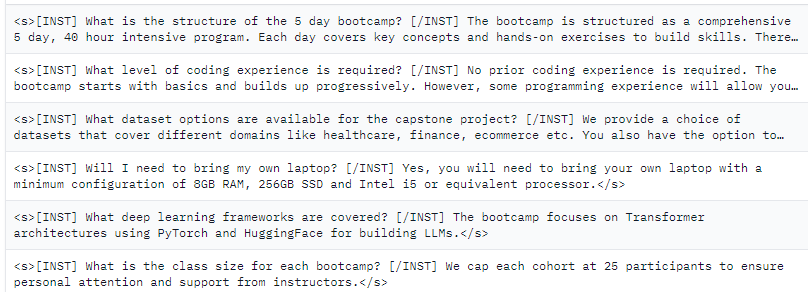

In [21]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset(dataset_name)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/158 [00:00<?, ? examples/s]

## Fine Tune the Model
The following section will take your dataset, and fine tune the model with it.

We will be using the **LoRA** technique of Parameter Efficient Fine Tuning **(PEFT)**.

The `LoraConfig` class initializes the configuration settings for the LoRA mechanism, enabling the customization of various parameters:

- **lora_alpha=16**: This parameter controls the scaling of the low-rank approximation. It’s like finding the right balance between the original model and the low-rank approximation. Higher values can make the approximation more influential during the fine-tuning process, which can affect both performance and computational cost.

- **lora_dropout=0.1**: This parameter represents the probability that the output of each neuron is set to zero during training. It is used to prevent overfitting, which occurs when the model becomes too tailored to the training data.

- **r=64**: Rank measures how the original weight matrices are decomposed into simpler, smaller matrices. This decomposition reduces computational demands and memory usage. Lower ranks can make the model faster but may impact its performance. The original LoRA paper suggests starting with a rank of 8, but for QLoRA, a rank of 64 is recommended.

- **bias="none"**: This setting specifies the type of bias used in the LoRA mechanism. Here, it is set to "none," indicating that no bias is introduced during the attention computation.

- **task_type="CAUSAL_LM"**: This parameter defines the specific task type for which the LoRA mechanism is being configured. In this case, it is set to "CAUSAL_LM," suggesting that the mechanism is tailored for causal language modeling tasks.

These configurations and settings allow for the fine-tuning and customization of the LoRA mechanism, enabling effective processing and representation of sequential data, particularly in the context of language modeling tasks.


In [22]:
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

# Load LoRA configuration
peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.1,
    r=64,
    bias="none",
    task_type="CAUSAL_LM",
)



## Training Arguments:
Defines the settings for the training process.

- **output_dir**: Directory where the outputs will be saved.
- **num_train_epochs**: Number of epochs.
- **per_device_train_batch_size**: Number of samples per batch per device. A smaller batch size (like 4) is used to ensure that the model fits in memory.
- **gradient_accumulation_steps**: Number of steps before performing a backward/update pass.
- **optim**: Specifies the optimizer. "paged_adamw_32bit" is a memory-efficient optimizer.
- **save_steps and logging_steps**: Control the frequency of model saves and logging.
- **learning_rate**: Controls the step size at each iteration.
- **weight_decay**: Regularization technique to prevent overfitting.
- **fp16 and bf16**: Precision settings. Useful for specific hardware like the A100.
- **max_grad_norm**: Clips gradient norms to prevent exploding gradients.
- **warmup_ratio**: Controls the learning rate warm-up.
- **group_by_length**: Speeds up training by grouping sequences of similar lengths.
- **lr_scheduler_type**: Specifies the learning rate schedule. "cosine" updates the learning rate using a cosine annealing schedule.

In [23]:
# Set training parameters
training_arguments = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=num_train_epochs,      # uses the number of epochs earlier
    per_device_train_batch_size=4,          # 4 seems reasonable
    gradient_accumulation_steps=2,          # 2 is fine, as we're a small batch
    optim="paged_adamw_32bit",              # default optimizer
    save_steps=0,                           # we're not gonna save
    logging_steps=10,                       # same value as used by Meta
    learning_rate=2e-4,                     # standard learning rate
    weight_decay=0.001,                     # standard weight decay 0.001
    fp16=False,                             # set to true for A100
    bf16=False,                             # set to true for A100
    max_grad_norm=0.3,                      # standard setting
    max_steps=-1,                           # needs to be -1, otherwise overrides epochs
    warmup_ratio=0.03,                      # standard warmup ratio
    group_by_length=True,                   # speeds up the training
    lr_scheduler_type="cosine",           # constant seems better than cosine
    report_to="tensorboard"
)



## SFT Trainer

The SFTTrainer is initialized with the model, dataset, tokenizer, training arguments, and other necessary configurations. The model is then fine-tuned using the trainer.train() method.

The `SFTTrainer` is configured with the following parameters:

- **model=model**: This parameter specifies the base model that will undergo fine-tuning, using the pre-trained model specified earlier in the code.

- **train_dataset=dataset**: The `train_dataset` parameter defines the dataset on which the model will be fine-tuned, ensuring that the training process occurs on the designated dataset.

- **peft_config=peft_config**: This parameter incorporates the LoRA PEFT configuration, ensuring that the fine-tuning process integrates the specific LoRA settings defined earlier, enhancing the model's understanding of local contexts and dependencies within the input sequences.

- **dataset_text_field="text"**: This setting specifies the text field within the dataset that will be used during the fine-tuning process, enabling the trainer to extract the relevant textual data for training.

- **max_seq_length=None**: The absence of a maximum sequence length implies that there are no constraints on the sequence length during the fine-tuning process, allowing the model to handle sequences of any length.

- **tokenizer=tokenizer**: This parameter indicates the tokenizer to be used during the fine-tuning process, utilizing the tokenizer that was loaded earlier and associated with the specific pre-trained model.

- **args=training_arguments**: The `args` parameter incorporates the training arguments, ensuring that the training process adheres to the specified training configurations and settings defined earlier.

- **packing=False**: With `packing` set to `False`, it indicates that packing, a process often used for sequence modeling, is not required during the fine-tuning process.



In [26]:
from datasets import Dataset
from trl import SFTTrainer
import pandas as pd
# Load your CSV file into a DataFrame
csv_path = '/content/TechnologyQ.csv'  # Replace with the actual path
df = pd.read_csv(csv_path)
# Assuming you have a DataFrame named df with 'Questions' and 'Answers' columns
questions = df['Question'].tolist()
answers = df['Answers'].tolist()

# Concatenate 'Questions' and 'Answers' to create the text field
texts = [f'{q} {a}' for q, a in zip(questions, answers)]

# Create a new DataFrame with the concatenated text field
new_df = pd.DataFrame({'text': texts})

# Convert the DataFrame to a Dataset
dataset = Dataset.from_pandas(new_df)

# Set supervised fine-tuning parameters
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    peft_config=peft_config,                # use our lora peft config
    dataset_text_field="text",
    max_seq_length=None,                    # no max sequence length
    tokenizer=tokenizer,                    # use the llama tokenizer
    args=training_arguments,                # use the training arguments
    packing=False,                          # don't need packing
)


/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:102: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:159: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/158 [00:00<?, ? examples/s]

In [ ]:
# # Set supervised fine-tuning parameters
# trainer = SFTTrainer(
#     model=model,
#     train_dataset=dataset,
#     peft_config=peft_config,                # use our lora peft config
#     dataset_text_field="text",
#     max_seq_length=None,                    # no max sequence length
#     tokenizer=tokenizer,                    # use the llama tokenizer
#     args=training_arguments,                # use the training arguments
#     packing=False,                          # don't need packing
# )



## Training and Saving the Model

In [27]:
# Train model
trainer.train()

# Save trained model
trainer.model.save_pretrained(new_model)

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


{'loss': 2.735, 'learning_rate': 0.00013333333333333334, 'epoch': 0.5}
{'loss': 2.4521, 'learning_rate': 0.00019994755690455152, 'epoch': 1.0}
{'loss': 1.8019, 'learning_rate': 0.0001995283421166614, 'epoch': 1.5}
{'loss': 1.5177, 'learning_rate': 0.00019869167087338907, 'epoch': 2.0}
{'loss': 1.1728, 'learning_rate': 0.00019744105246469263, 'epoch': 2.5}
{'loss': 0.9667, 'learning_rate': 0.00019578173241879872, 'epoch': 3.0}
{'loss': 0.7465, 'learning_rate': 0.00019372067050063438, 'epoch': 3.5}
{'loss': 0.6295, 'learning_rate': 0.00019126651152015403, 'epoch': 4.0}
{'loss': 0.4383, 'learning_rate': 0.00018842954907300236, 'epoch': 4.5}
{'loss': 0.3536, 'learning_rate': 0.00018522168236559695, 'epoch': 5.0}
{'loss': 0.2451, 'learning_rate': 0.0001816563663057211, 'epoch': 5.5}
{'loss': 0.2324, 'learning_rate': 0.00017774855506796496, 'epoch': 6.0}
{'loss': 0.1807, 'learning_rate': 0.00017351463937072004, 'epoch': 6.5}
{'loss': 0.177, 'learning_rate': 0.00016897237772781044, 'epoch': 7

# Run the Model
The following runs the model post fine-tuning. After fine-tuning, it's important to see the performance improvements. So, we test our newly fine-tuned model using the same prompt as before to compare results.

In [30]:
# Ignore warnings
logging.set_verbosity(logging.CRITICAL)

prompt= "What types of robotics projects are covered in the Lego Spike course?"
#prompt = "What coding languages are covered in the Python course?"
#prompt="What age group is suitable for the courses at Technology Garage?"
#prompt="What is Technology Garage?"

pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=150)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

<s>[INST] What types of robotics projects are covered in the Lego Spike course? [/INST] The Lego Spike course in Stage 1 covers a variety of robotics projects, allowing students to build and program their robotic creations using Lego Spike kits. This hands-on approach encourages exploration, innovation, and problem-solving skills in the field of robotics. Students can build and program their robotic creations to perform specific tasks, experimenting with different combinations of Lego Spike kits to create unique and functional robots.

This approach helps students develop a solid foundation in robotics, introducing them to the concepts of robotics
